<h1>Aflevering 7</h1>
<h3>Hold CE2</h3>
Gruppe: Alexander Bjerno & Christian Winkler

In [5]:
import numpy as np
import matplotlib.pyplot as plt


<h3>(a)</h3>

Vi skal vise hvordan belysningsnieauet 0...599 er relateret til lysstyrken af lamperne, igennem et lineart ligningssystem hvorved vi skal opstille koefficientmatricen

In [6]:
import numpy as np

# Estimate lamp coordinates from diagram
lamp_coords = np.array([
    [2., 3., 3.], [4., 19., 3.], [4., 13., 3.6], [11., 6., 3.5], [15., 2., 4.5], [20., 5., 2.8],
    [28., 9., 3.4], [12., 12., 4.], [23., 12., 4.], [16., 16., 3.], [25., 16., 3.8], [13., 18., 3.6]
])

#Insert lamp coordinates in the grid, first creates the 30*20 grid of zeroes, then fills with the lamp coordinates
parking = np.zeros(shape = (30, 20))
for x in lamp_coords:
    parking[int(x[0]), int(x[1])] = x[2]
    
n = np.linspace(0.0, 599.00, 600)
j = np.zeros(shape = (600, 2))

#Assigning the parking space grid j
for x in n:
    j[int(x)] = np.array([x%30, int(x/30)])

#Defining how to calculate the distance to the middle of each cell
def d_ij(i, j):
    distance = np.sqrt(abs(i[0] - (j[0] + 0.5))**2 + abs(i[1] - (j[1] + 0.5 ))**2 )**2 + i[2]**2
    return distance

A = np.zeros(shape = (600, 12))
#Here we set up our koefficientmatrix A
for k in n:
    for a in range(12):
        A[int(k), int(a)] = 1 / d_ij(lamp_coords[int(a)], j[int(k)])





<h3>(b)</h3> 

Now we have to make a heatplot of the parking space showing the lighting level

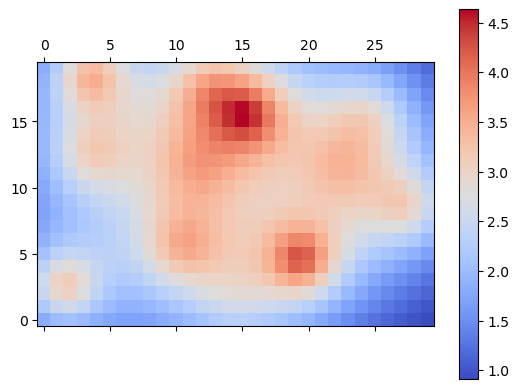

In [7]:

#Set light strength for all lamps to 20
xi = np.ones((12,1))*20

light_map = np.zeros(shape = (30, 20))
#The lighting from a lamp on a tile i given by xi*1/d_ij^2 where A = 1/d_ij^2
lighting = A @ xi
#Plotting our light_map with the the lighting information
for x in n:
    light_map[int(j[int(x)][0]), int(j[int(x)][1])] = lighting[int(x)]
    
fig, ax = plt.subplots()
im = (ax.matshow(light_map.T, cmap='coolwarm', origin='lower')) #Plotting the heatmap
fig.colorbar(im)


<h3>(c)</h3>

In [8]:
def forbedret_gram_schmidt(a):
    _, k = a.shape
    q = np.copy(a)
    r = np.zeros((k, k))
    for i in range(k):
        r[i, i] = np.linalg.norm(q[:, i])
        q[:, i] /= r[i, i]
        r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:]
        q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:]
    return q, r


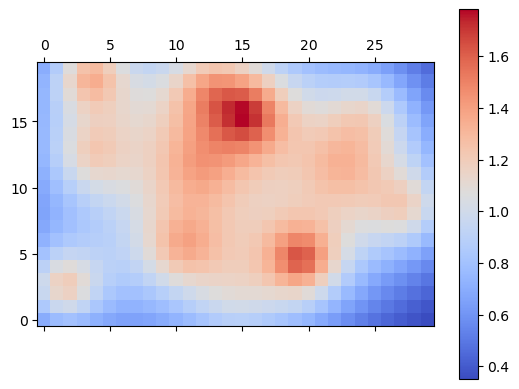

In [107]:
q, r = forbedret_gram_schmidt(A)
new_lights = np.ones(shape=(12,1))
temp = np.zeros(shape=(12,1))
for x in range(0, 12):
    temp[x] = 1 / np.mean(r[0])
light_map2 = np.zeros(shape = (30, 20))
lighting2 = A @ temp
for x in n:
    light_map2[int(j[int(x)][0]), int(j[int(x)][1])] = lighting2[int(x)]
    
fig, ax = plt.subplots()
im = (ax.matshow(light_map2.T, cmap='coolwarm', origin='lower')) #Plotting the heatmap
fig.colorbar(im)


<h3>(d)</h3>

<h3>(e)</h3>